<a href="https://colab.research.google.com/github/Carlogui/IMEC_4434/blob/main/Lab_1_Tables_and_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries needed
import numpy as np

import matplotlib.pyplot as plt


<strong><font color='black'><h1><left> Lab 1</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Graphs and Tables:</left><h1></font></strong>

<em><font color='black'><left>Arhenius Plot:</left></font></em>



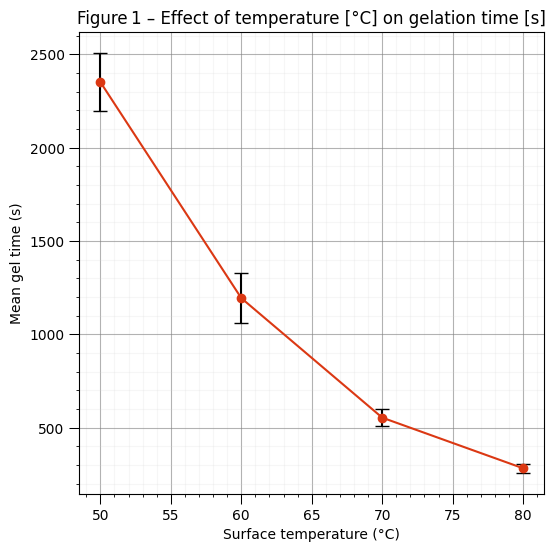

[2351.         1193.66666667  553.33333333  282.        ]
[156.78966803 135.91296234  44.37717131  24.51530134]
90.39877575609202


In [ ]:
# Figure 1 – Surface temperature vs mean gel time
raw_times = np.array([

    [2285, 2530, 2238],   # 50 °C

    [1280, 1264, 1037],   # 60 °C

    [ 504,  590,  566],   # 70 °C

    [ 307,  258,  281]    # 80 °C
])

temp_C   = np.array([50, 60, 70, 80])          # Surface‑plate temperatures

mean_gel = raw_times.mean(axis=1)              # Mean gel time at each T

sd_gel   = raw_times.std(axis=1, ddof=1)       # Sample SD (N – 1 in divisor)

avg_sd_gel = sd_gel.mean()                     # Average sample SD

plt.figure(figsize=(6,6))
plt.errorbar(temp_C, mean_gel, yerr=sd_gel, fmt='o-', capsize=5, color='#DB3813',  ecolor='black',)
plt.xlabel('Surface temperature (°C)'); plt.ylabel('Mean gel time (s)')
plt.title('Figure 1 – Effect of temperature [°C] on gelation time [s]')
plt.grid(True)
plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
plt.grid()
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.show()

print (mean_gel)

print(sd_gel)

print(avg_sd_gel)

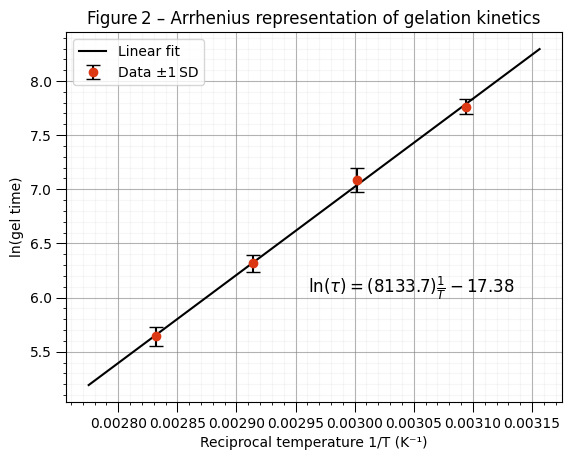

Linear fit equation: ln(τ) = (8133.6725)*(1/T) + (-17.3785)  [T in K]
Slope (Ea/R)       = 8,133.67 K
Activation energy  = 67.62 kJ/mol
Intercept ln(t₀)   = -17.3785
Coefficient R²     = 0.9987


In [ ]:
# Figure 2
T_K    = temp_C + 273.15

inv_T  = 1 / T_K

ln_tau = np.log(mean_gel)

sd_ln  = sd_gel / mean_gel


slope, intercept = np.polyfit(inv_T, ln_tau, 1)  # Least‑squares fit inear regression: ln τ = m*(1/T) + b

inv_fit = np.linspace(inv_T.min()*0.98, inv_T.max()*1.02, 200)

ln_fit  = slope * inv_fit + intercept

eqn_str = r"$\ln(\tau) = ({:.1f})\frac{{1}}{{T}} {:+.2f}$".format(slope, intercept)

R_gas  = 8.314                                    # J·mol⁻¹·K⁻¹

Ea_J   = slope * R_gas                           # Activation energy (J·mol⁻¹)

Ea_kJ  = Ea_J / 1e3                              # Convert to kJ·mol⁻¹

ln_pred = slope * inv_T + intercept

ss_res  = np.sum((ln_tau - ln_pred)**2)            # residual sum of squares

ss_tot  = np.sum((ln_tau - ln_tau.mean())**2)      # total sum of squares

R2      = 1 - ss_res / ss_tot

plt.figure()
plt.errorbar(inv_T, ln_tau, yerr=sd_ln, fmt='o',
             ecolor='black', capsize=5, label='Data ±1 SD', color='#DB3813')
plt.plot(inv_fit, ln_fit, label='Linear fit', color='black')
plt.xlabel('Reciprocal temperature 1/T (K⁻¹)')
plt.ylabel('ln(gel time)')
plt.title('Figure 2 – Arrhenius representation of gelation kinetics')
plt.grid(True)
plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
plt.grid()
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
plt.text(inv_T.mean(), ln_tau.min()+0.4, eqn_str, fontsize=12, color='black')
plt.legend()
plt.show()


print(f"Linear fit equation: ln(τ) = ({slope:.4f})*(1/T) + ({intercept:.4f})  [T in K]")
print(f"Slope (Ea/R)       = {slope:,.2f} K")
print(f"Activation energy  = {Ea_kJ:.2f} kJ/mol")
print(f"Intercept ln(t₀)   = {intercept:.4f}")
print(f"Coefficient R²     = {R2:.4f}")

In [ ]:
def gel_time_sec(T_Celsius: float) -> float:

    T_kelvin = T_Celsius + 273.15

    ln_tau_pred = slope * (1 / T_kelvin) + intercept

    return np.exp(ln_tau_pred)

# Predictions at 25 °C and 100 °C
t_25C  = gel_time_sec(25)    # room temperature

t_100C = gel_time_sec(100)   # elevated temperature

print(f"Predicted gel time at 25 °C  : {t_25C:,.0f} s  ({t_25C/3600:.2f} h)")
print(f"Predicted gel time at 100 °C : {t_100C:,.1f} s  ({t_100C/60:.2f} min)")

Predicted gel time at 25 °C  : 19,970 s  (5.55 h)
Predicted gel time at 100 °C : 83.0 s  (1.38 min)


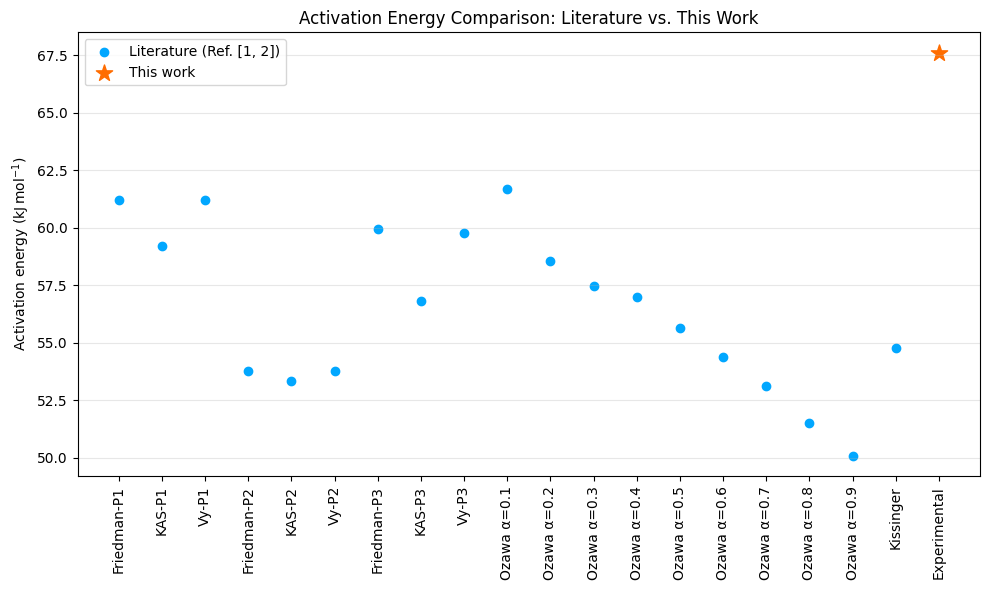

In [ ]:
# Experimental activation energy (this work)
Ea_exp = 67.62  # kJ/mol

# Literature activation energies extracted from the references [1,2]
labels_lit = [
    'Friedman‑P1', 'KAS‑P1', 'Vy‑P1',
    'Friedman‑P2', 'KAS‑P2', 'Vy‑P2',
    'Friedman‑P3', 'KAS‑P3', 'Vy‑P3',
    'Ozawa α=0.1', 'Ozawa α=0.2', 'Ozawa α=0.3', 'Ozawa α=0.4',
    'Ozawa α=0.5', 'Ozawa α=0.6', 'Ozawa α=0.7', 'Ozawa α=0.8', 'Ozawa α=0.9',
    'Kissinger'
]
Ea_lit = [
    61.2, 59.2, 61.2,        # Product 1
    53.77, 53.33, 53.76,     # Product 2
    59.93, 56.80, 59.78,     # Product 3
    61.69, 58.54, 57.47, 57.01, 55.65, 54.40, 53.13, 51.49, 50.07,  # Ozawa
    54.79                    # Kissinger
]


plt.figure(figsize=(10, 6))
x_lit = np.arange(len(Ea_lit))
plt.scatter(x_lit, Ea_lit, color="#01a7ff", label='Literature (Ref. [1, 2])')
plt.scatter(len(Ea_lit), Ea_exp, marker='*', s=150, color="#ff6d01", label='This work')
all_labels = labels_lit + ['Experimental']
plt.xticks(np.arange(len(all_labels)), all_labels, rotation=90)
plt.ylabel('Activation energy (kJ mol$^{-1}$)')
plt.title('Activation Energy Comparison: Literature vs. This Work')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()